In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты? (4б)** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [4]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [5]:
from sklearn.decomposition import PCA

### Your code is here

pca = PCA(n_components=2)

PCA_dataset = pca.fit_transform(X_centered)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

PCA_dataset.head()

,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [6]:
### Сконкатим с таргетом

PCA_dataset = np.concatenate((PCA_dataset.values, y.values.reshape(-1, 1)),
                              axis=1)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2', 'SEGMENT'])
PCA_dataset.head()

,PCA_1,PCA_2,SEGMENT
0,-38.743132,-23.282634,2.0
1,-13.209252,-25.023815,2.0
2,-2.004910,-1.637085,2.0
3,17.178458,-0.907657,3.0
4,14.477389,-11.656752,2.0


In [13]:
#Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?
pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

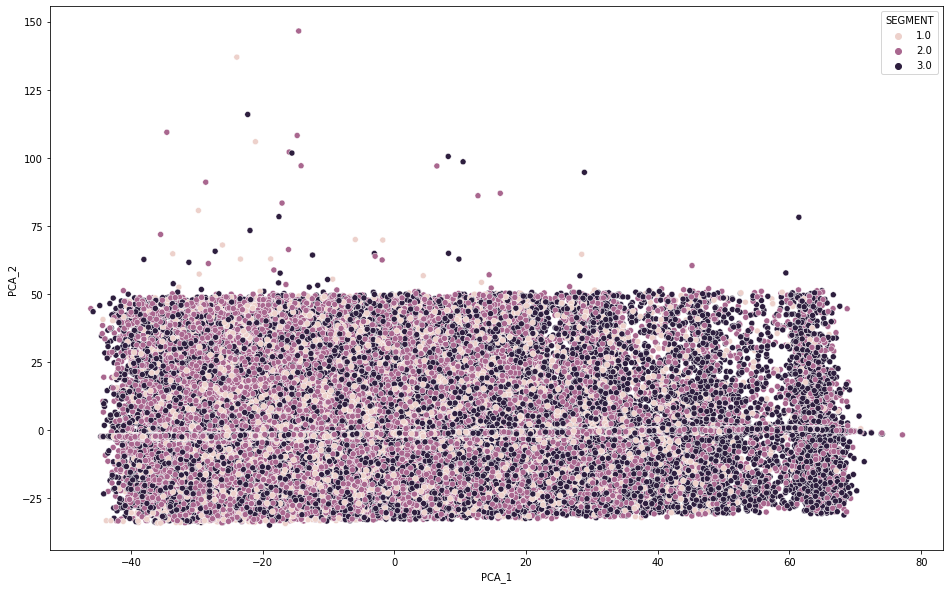

In [12]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=PCA_dataset, x="PCA_1", y="PCA_2", hue="SEGMENT")


**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению (2б)**


In [17]:
### Your code is here
first_component_corr = X_centered.corrwith(PCA_dataset.PCA_1)
second_component_corr = X_centered.corrwith(PCA_dataset.PCA_2)


corrs = pd.concat((first_component_corr, second_component_corr),
                  axis=1)

corrs.columns = ['PCA_1', 'PCA_2']

corrs


,PCA_1,PCA_2
Trip_Distance,0.997767,0.018410
Customer_Since_Months,0.121591,0.003500
Life_Style_Index,0.480658,-0.025901
Customer_Rating,-0.070104,-0.003757
Cancellation_Last_1Month,0.000803,0.008960
Var1,-0.048532,0.998600
Var2,0.247178,-0.028448
Var3,0.293819,-0.026583
Type_of_Cab_B,-0.048751,0.005723
Type_of_Cab_C,-0.012059,-0.003397


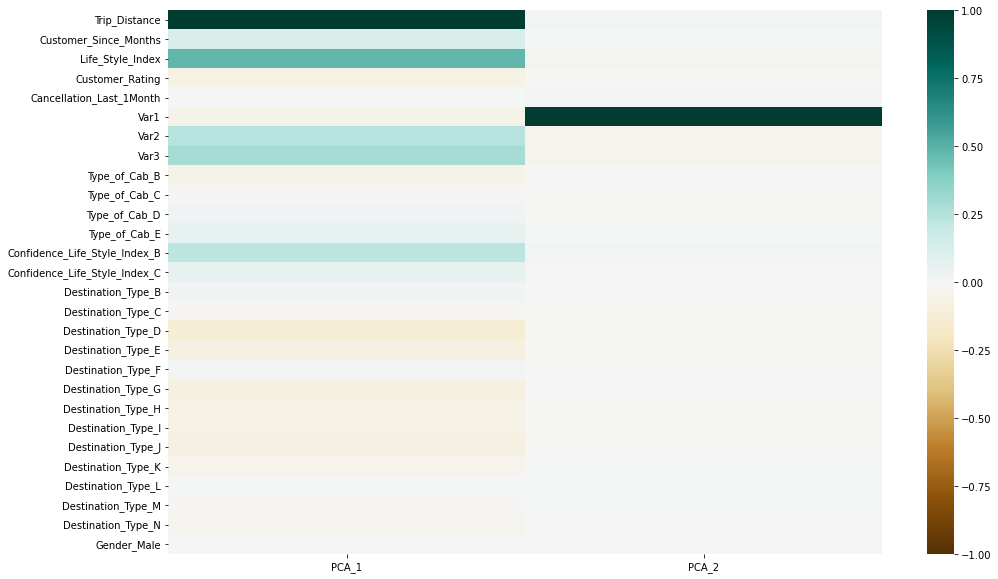

In [18]:
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой? (2б)**

In [19]:
### Your code is here

pca_3d = PCA(n_components=3)

pca_3d.fit(X_centered)

PCA_dataset_3d = pca_3d.transform(X_centered)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_dataset_3d.head()



,PCA_1,PCA_2,PCA_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348


In [20]:
### Что содержится в новых признаках?

first_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_3)

corrs_3d = pd.concat((first_component_corr_3d, 
                      second_component_corr_3d, 
                      third_component_corr_3d), axis=1)

corrs_3d.columns = ['PCA_1', 'PCA_2', 'PCA_3']

corrs_3d

,PCA_1,PCA_2,PCA_3
Trip_Distance,0.997767,0.018410,-0.064176
Customer_Since_Months,0.121591,0.003500,0.081370
Life_Style_Index,0.480658,-0.025901,0.166688
Customer_Rating,-0.070104,-0.003757,-0.236793
Cancellation_Last_1Month,0.000803,0.008960,0.136222
Var1,-0.048532,0.998600,0.021003
Var2,0.247178,-0.028448,0.705159
Var3,0.293819,-0.026583,0.951081
Type_of_Cab_B,-0.048751,0.005723,0.011211
Type_of_Cab_C,-0.012059,-0.003397,-0.008707


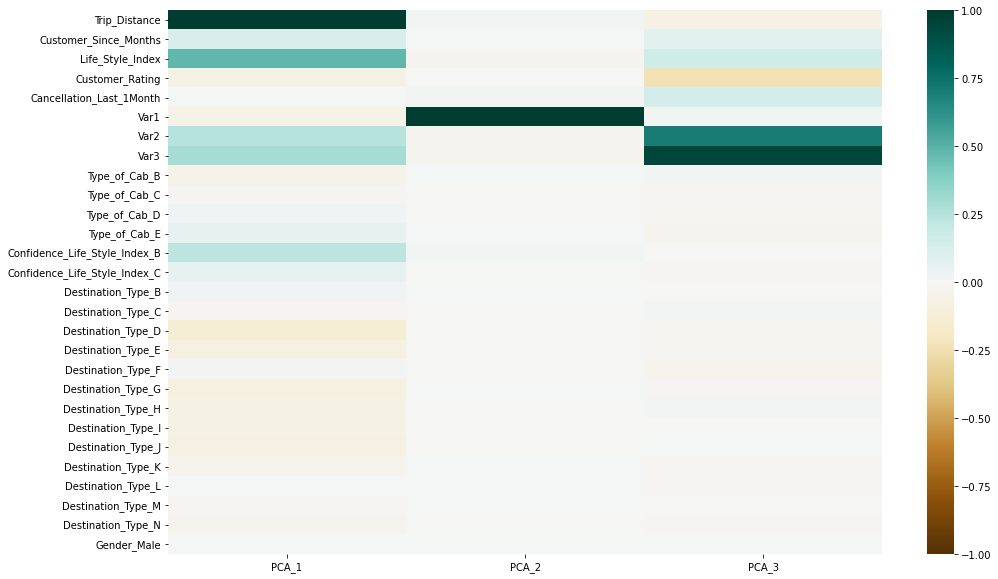

In [21]:
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs_3d, 
            xticklabels=corrs_3d.columns,
            yticklabels=corrs_3d.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [22]:
### Сконкатим с таргетом

PCA_dataset_3d = np.concatenate((PCA_dataset_3d.values, y.values.reshape(-1, 1)),
                                 axis=1)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3', 'SEGMENT'])

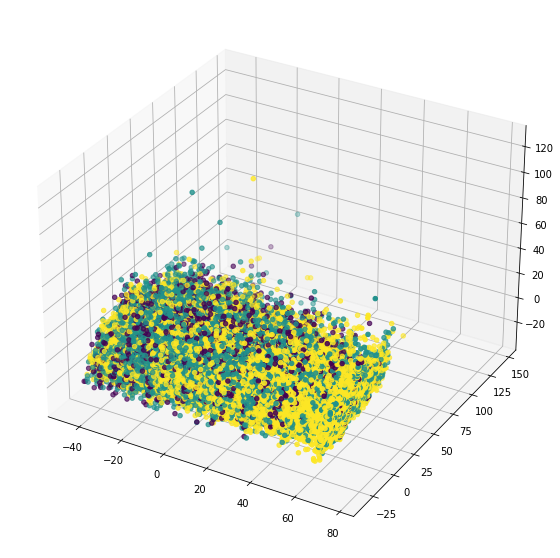

In [23]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = PCA_dataset_3d['SEGMENT'].replace(['A', 'B', 'C', 'D'],
                                            ['orange', 'green', 'red', 'blue'])

ax.scatter3D(PCA_dataset_3d['PCA_1'], 
             PCA_dataset_3d['PCA_2'],
             PCA_dataset_3d['PCA_3'], 
             c=colors)

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [24]:
### Your code is here


PCA_dataset_3d.corr()


,PCA_1,PCA_2,PCA_3,SEGMENT
PCA_1,1.000000e+00,-8.033072e-17,4.768547e-16,0.131399
PCA_2,-8.033072e-17,1.000000e+00,1.835381e-15,-0.005755
PCA_3,4.768547e-16,1.835381e-15,1.000000e+00,-0.077694
SEGMENT,1.313990e-01,-5.754804e-03,-7.769403e-02,1.000000


**Задание 4.** Обучите логистическую регрессию на первых двух компонентах и подберите гиперпараметры. Обучите логистическую регрессию на изначальных данных. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях (2б)**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [25]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [50]:
#Обучите логистическую регрессию на первых двух компонентах
np.random.seed(2022)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('PCA', PCA(2)),
                 ('LR', LogisticRegression())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('LR', LogisticRegression())])

In [51]:
# Посчитать precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg
from sklearn.metrics import classification_report
print(classification_report(y_test, pipe.predict(X_test), labels=[1, 2, 3],digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.477     0.670     0.557     11349
           3      0.483     0.522     0.501      9612

    accuracy                          0.479     26333
   macro avg      0.320     0.397     0.353     26333
weighted avg      0.382     0.479     0.423     26333



In [52]:
#Как посмотреть какие признаки можно изменить 
pipe.get_params().keys() 

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'PCA', 'LR', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'LR__C', 'LR__class_weight', 'LR__dual', 'LR__fit_intercept', 'LR__intercept_scaling', 'LR__l1_ratio', 'LR__max_iter', 'LR__multi_class', 'LR__n_jobs', 'LR__penalty', 'LR__random_state', 'LR__solver', 'LR__tol', 'LR__verbose', 'LR__warm_start'])

In [53]:
### Your code is here

np.random.seed(2022)
param_grid = {'LR__penalty': ['l1', 'l2', 'elasticnet'],
              'LR__C': [1e-5, 0.0001, 0.001, 0.01]}

from sklearn.model_selection import GridSearchCV

search = GridSearchCV(pipe, param_grid, scoring='accuracy')

search.fit(X_train, y_train)

print(search.best_params_)




{'LR__C': 0.0001, 'LR__penalty': 'l2'}


In [54]:
# Посчитать precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg
from sklearn.metrics import classification_report
print(classification_report(y_test, search.predict(X_test), labels=[1, 2, 3],digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.477     0.696     0.567     11349
           3      0.495     0.503     0.499      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.355     26333
weighted avg      0.386     0.484     0.426     26333



In [55]:
#Обучите логистическую регрессию на изначальных данных
np.random.seed(2022)
pipe_all = Pipeline([('scaler', StandardScaler()),
                 ('LR', LogisticRegression())])
pipe_all.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LR', LogisticRegression())])

In [56]:
# Посчитать precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg
from sklearn.metrics import classification_report
print(classification_report(y_test, pipe_all.predict(X_test), labels=[1, 2, 3],digits=3))

              precision    recall  f1-score   support

           1      0.736     0.539     0.622      5372
           2      0.637     0.825     0.719     11349
           3      0.735     0.589     0.654      9612

    accuracy                          0.680     26333
   macro avg      0.702     0.651     0.665     26333
weighted avg      0.693     0.680     0.675     26333



In [71]:
### Your code is here
np.random.seed(2022)
param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

pipe_PCA = Pipeline([('scaler', StandardScaler()),
                 ('PCA', PCA(2)),
                 ('model', LogisticRegression())])


pipe_LR = Pipeline([('scaler', StandardScaler()),
                 ('model', LogisticRegression())])


search_PCA = GridSearchCV(pipe_PCA, param_grid=param_grid)
search_PCA.fit(X_train, y_train)

print(classification_report(y_test, search_PCA.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.477     0.696     0.567     11349
           3      0.495     0.503     0.499      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.355     26333
weighted avg      0.386     0.484     0.426     26333



In [72]:
np.random.seed(2022)
search = GridSearchCV(pipe_LR, param_grid=param_grid)
search.fit(X_train, y_train)
print(classification_report(y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую (2б)**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [73]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga'))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [74]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    
    ### Your code is here
    accuracy_dict[n_components], f1_score_dict[n_components] = train_pca_i(n_components, X_train, y_train)
print(f1_score_dict[28])

0.6760408405305015
Wall time: 1min 10s


Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [6]:
from sklearn.manifold import TSNE

### Your code is here



**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [7]:
### Your code is here



Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!